# CAS BDAI CUP SUBMISSION NOTEBOOK - Group 03: NostraData-mus SA



# First steps




## Data Import

In [2]:
#import data
import pandas as pd
features = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")
train = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/test.csv")

## Initial Investigations

In [ ]:
features.info()

**Finding:** 11 features and 30'857 instances.

In [ ]:
train.info()

**Finding:** 11 features and 30'857 instances.

In [ ]:
test.info()

**Finding:** 10 features and 15'896 instances.

## Descriptive Statistics

In [35]:
#encode categorical data
features = pd.get_dummies(features, drop_first=False)
test = pd.get_dummies(test, drop_first=False)
train = pd.get_dummies(train, drop_first=True)
features.describe()

,year,price,mileage,tax,mpg,engineSize,ID,model_ 1 Series,model_ 2 Series,model_ 3 Series,...,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,brand_Audi,brand_BMW,brand_Mercedes,brand_VW
count,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,...,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000,30857.000000
mean,2017.231844,20758.643452,23300.447030,120.812295,54.436770,1.873821,23377.013255,0.041806,0.027287,0.052695,...,0.369641,0.379330,0.558641,0.013060,0.002819,0.425479,0.216353,0.211686,0.264737,0.307224
std,2.087807,9786.994817,22313.826135,60.572940,14.863921,0.539387,13450.630512,0.200148,0.162922,0.223427,...,0.482715,0.485228,0.496557,0.113535,0.053025,0.494423,0.411764,0.408510,0.441200,0.461350
min,1996.000000,650.000000,1.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,13990.000000,5931.000000,125.000000,45.600000,1.500000,11766.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,19250.000000,17000.000000,145.000000,53.300000,2.000000,23444.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,25491.000000,33814.000000,145.000000,61.400000,2.000000,34926.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2020.000000,149948.000000,214000.000000,580.000000,217.300000,6.200000,46752.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Analysis: Training Data

In [ ]:
# Source: student_submission
import seaborn as sns
import matplotlib.pyplot as plt

# Bestimmung der Korrelationen zwischen den Variablen im Datensatz
corr = train.corr()

# Illustration der Korrelation
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Korrelation'})
ax.set_title("Korrelationen der Variablen im gesamten Datensatz")
plt.show()

## Correlation Analysis: Test Data

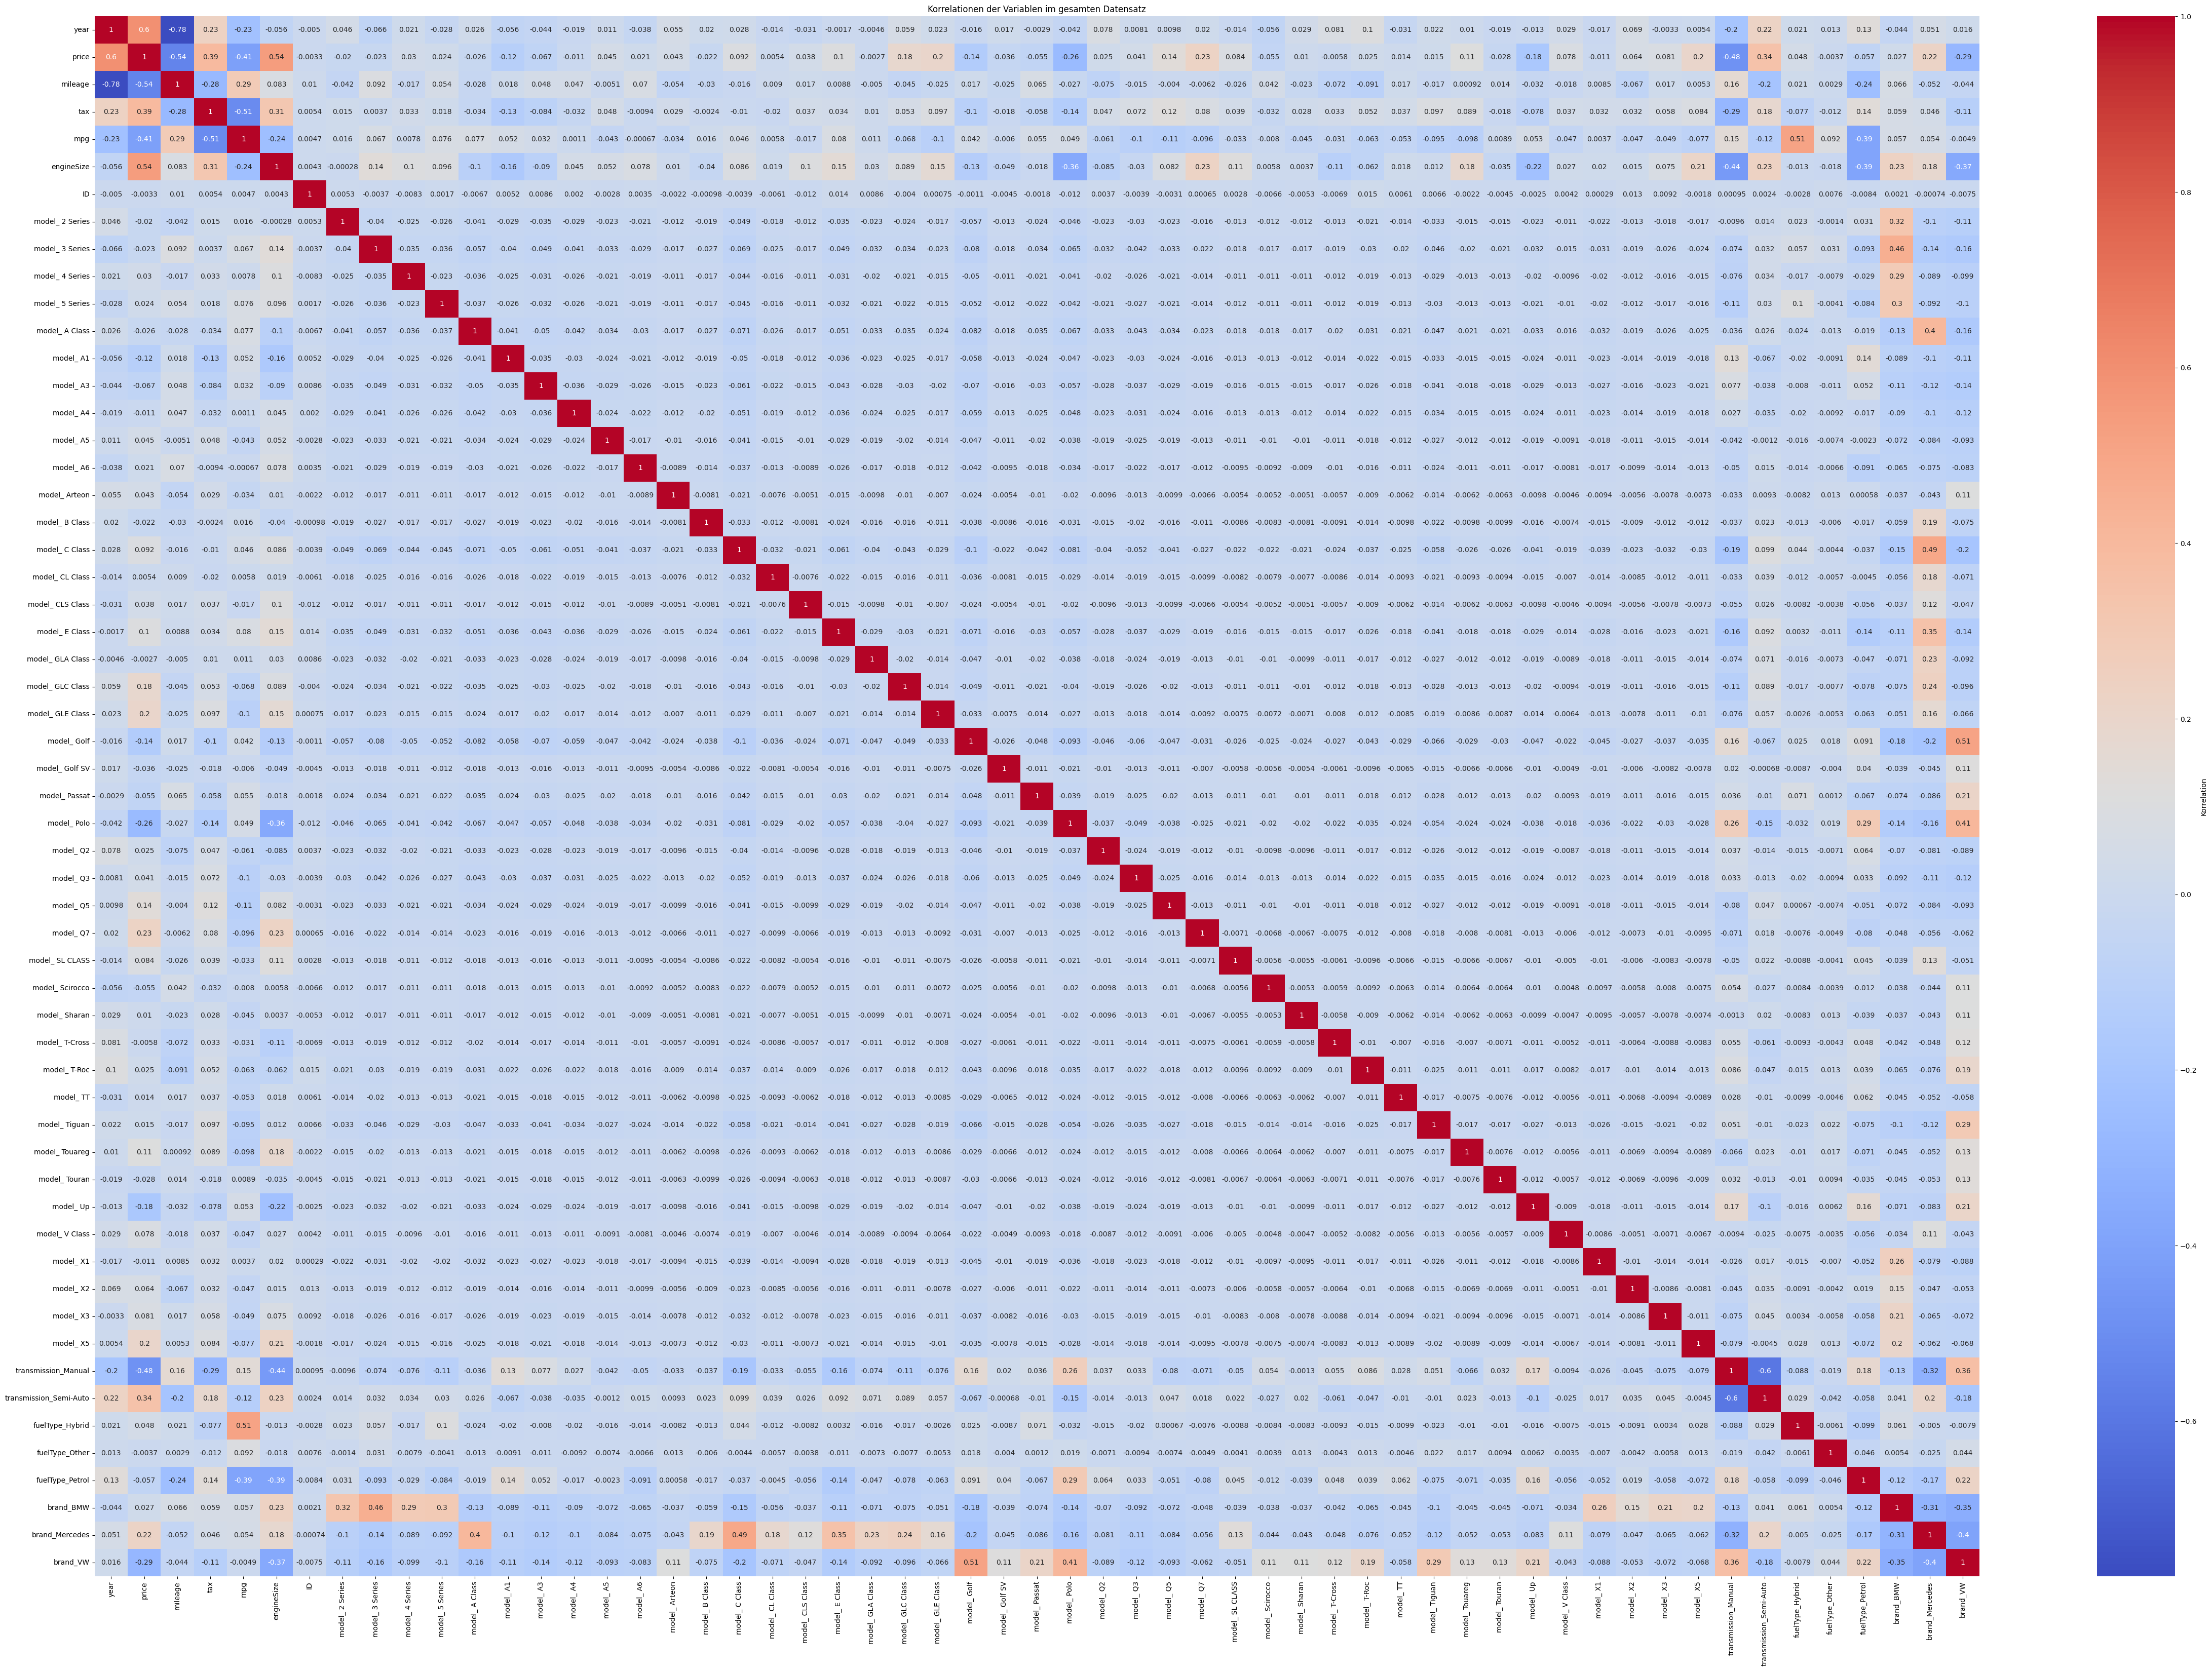

In [8]:
# Source: student_submission
import seaborn as sns
import matplotlib.pyplot as plt

# Bestimmung der Korrelationen zwischen den Variablen im Datensatz
corr = train.corr()

# Größe der Graphik festlegen
plt.figure(figsize=(60, 40))

# Illustration der Korrelation
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Korrelation'})
ax.set_title("Korrelationen der Variablen im gesamten Datensatz")
plt.show()

# Build Prediction Models

## Linear Regression: Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Instantiate Model
model_base = LinearRegression()

# Create Train Data
X = train.drop("ID", axis=1)
X = X.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

print(X_train.head)

# fit model
model_base.fit(X_train, y_train)

#make prediction
y_pred = model_base.predict(X_test)

In [ ]:
def get_summary_report(X_train, y_train):
  import statsmodels.api as sm
  X_train = sm.add_constant(X_train, prepend=False)
  linreg_sm  = sm.OLS(y_train, X_train)
  results = linreg_sm.fit()
  return results

results = get_summary_report(X_train, y_train)
print(results.summary())

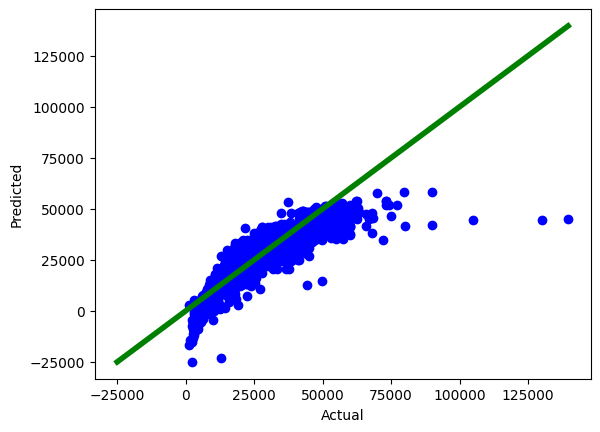

In [12]:
def actual_vs_predicted_plot(y_true, y_pred):
  import numpy as np
  import matplotlib.pyplot as plt
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

actual_vs_predicted_plot(y_test, y_pred)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
print( 'MSE: ' +str(mean_squared_error(y_test, y_pred, squared=False)))
print( 'MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

MSE: 4152.388339374328
MAPE: 0.15341367576610618


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate Model
model_tree = DecisionTreeRegressor(random_state=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
model_tree.fit(X_train,y_train)

y_pred = model_tree.predict(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

model_tree_RMSE = mean_squared_error(y_test, y_pred, squared=False)
print( 'MSE: ' +str(mean_squared_error(y_test, y_pred, squared=False)))
print( 'MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

MSE: 3255.5639769553854
MAPE: 0.09317919520850823


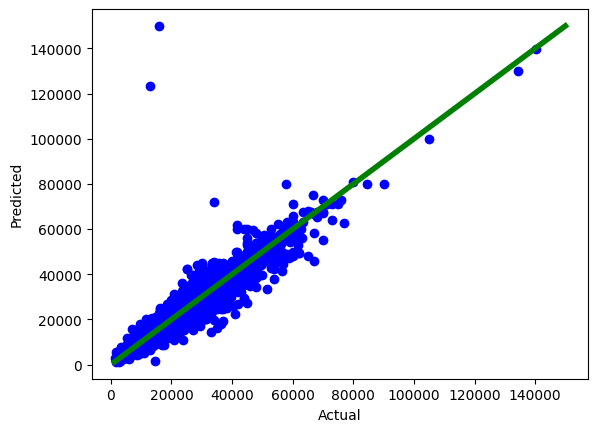

In [31]:
def actual_vs_predicted_plot(y_true, y_pred):
  import numpy as np
  import matplotlib.pyplot as plt
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

actual_vs_predicted_plot(y_test, y_pred)

## Random Forest

In [38]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Instantiate model with 1000 decision trees
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

X = train.drop("ID", axis=1)
X = X.drop("price", axis=1)
X = X.drop("tax", axis = 1)
y = train["price"]

# Train the model on training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
model_rf.fit(X, y)

y_pred = model_rf.predict(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

model_rf_RMSE = mean_squared_error(y_test, y_pred, squared=False)
print( 'MSE: ' +str(mean_squared_error(y_test, y_pred, squared=False)))
print( 'MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

MSE: 841.5563331250686
MAPE: 0.026505308022156258


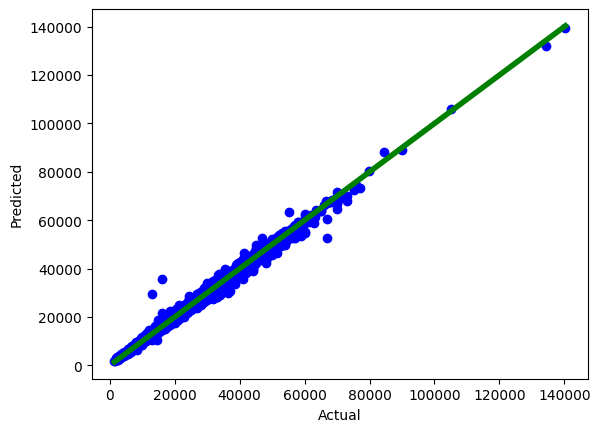

In [40]:
def actual_vs_predicted_plot(y_true, y_pred):
  import numpy as np
  import matplotlib.pyplot as plt
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

actual_vs_predicted_plot(y_test, y_pred)

In [46]:
def plot_ROC(model, X_test, y_test):
  import matplotlib.pyplot as plt
  from sklearn.metrics import RocCurveDisplay
  tree_ROC = RocCurveDisplay.from_estimator(model, X_test, y_test, color='green', linewidth=3)
  plt.title('ROC Curve')
  plt.xlabel('False Alarm (1 - Specificity)')
  plt.ylabel('Recall (Sensitivity)')
  plt.show()

# Save Results for Submission

Make predictions on the competition data with your trained model

In [ ]:
test_predictions= model.predict(test)

In [ ]:
model_name = "IvoTestSubmission.csv"

In [ ]:
def save_submission_for_kaggle(model_name, test_predictions, test):
  import pandas as pd
  submission_data = pd.DataFrame({"ID": test["ID"], "Actual": test_predictions})
  submission_data.to_csv(model_name, index=False)

## Save submission file

In [ ]:
save_submission_for_kaggle(model_name, test_predictions, test)

## FOR GOOGLE COLAB USERS ONLY: Download the created file

In [ ]:
try:
  from google.colab import files
  files.download(model_name)
except ModuleNotFoundError:
  print("Not using Google Colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## FOR ANACONDA USERS ONLY: Find the created file in your folder structure

The file is located in the same directory as your notebook.

In [ ]:
# run this cell if you don't know the location
import os
print(os.getcwd())

/content


# How to get Going

- Try out other algorithms!
- Try out Cross Validation and Hyperparameter Tuning (see coding hint below)
- Try to understand why different models perform better or worse. Make Visualizations (Actual vs. Predicted Plots, Feature Importances, etc.)
- Try to make ensemble different predictions (average of multiple models)

# Implementation Help for Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# fit model
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function
parameters = _____ # hyperparameters to be optimized
model_CV = GridSearchCV(_____, parameters, scoring=RMSE, cv=5) # Apply 5 Cross Validiation Folds to find best hyperparameters

NameError: ignored